# English Wikipedia page views
## Sample API code
This code is made available for re-use under a [CC0 license](https://creativecommons.org/share-your-work/public-domain/cc0/). 

This is based on [a notebook](https://public.paws.wmcloud.org/User:Jtmorgan/data512_a1_example.ipynb) by Jonathan Morgan at UW-Seattle. 

In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [4]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
example_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "granularity" : "daily",
                    "start" : "2019010100", #YYYYMMDDHH
                    "end" :   '2021090100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/staeiou',
    'From': 'stuart@stuartgeiger.com'
}

In [5]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [6]:
example_monthly_pageviews = api_call(endpoint_pageviews, example_params_pageviews)

In [7]:
example_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010100',
  'views': 258432938},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010200',
  'views': 269669563},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010300',
  'views': 262928832},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010400',
  'views': 257655473},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'user',
  'granularity': 'daily',
  'timestamp': '2019010500',
  'views': 258422861}]

In [8]:
df = pd.DataFrame(example_monthly_pageviews['items'])
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,user,daily,2019010100,258432938
1,en.wikipedia,all-access,user,daily,2019010200,269669563
2,en.wikipedia,all-access,user,daily,2019010300,262928832
3,en.wikipedia,all-access,user,daily,2019010400,257655473
4,en.wikipedia,all-access,user,daily,2019010500,258422861
...,...,...,...,...,...,...
970,en.wikipedia,all-access,user,daily,2021082800,233546365
971,en.wikipedia,all-access,user,daily,2021082900,252084967
972,en.wikipedia,all-access,user,daily,2021083000,248667495
973,en.wikipedia,all-access,user,daily,2021083100,239193347


In [9]:
df = df[['timestamp','views']]

In [10]:
pd.to_datetime(df['timestamp'], format="%Y%m%d00")

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
970   2021-08-28
971   2021-08-29
972   2021-08-30
973   2021-08-31
974   2021-09-01
Name: timestamp, Length: 975, dtype: datetime64[ns]

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()
df = df.set_index('timestamp')
df

<ipython-input-11-e391ed13c527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y%m%d00").copy()


,views
timestamp,
2019-01-01,258432938
2019-01-02,269669563
2019-01-03,262928832
2019-01-04,257655473
2019-01-05,258422861
...,...
2021-08-28,233546365
2021-08-29,252084967
2021-08-30,248667495


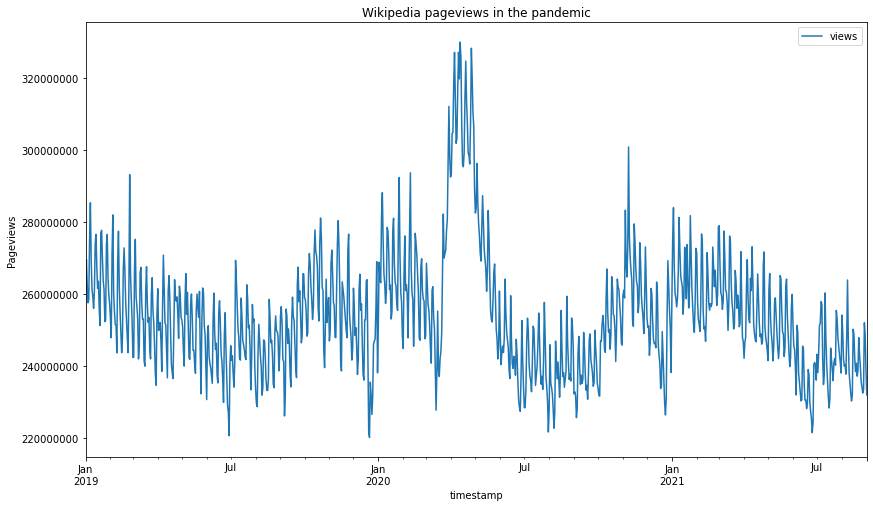

In [12]:
fig = df.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Wikipedia pageviews in the pandemic")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

### 1. Pageviews for an article of your choice on English Wikipedia, plotted daily, for the calendar year 2020

In [13]:
article_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

In [14]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
article_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "article" : "Toothpaste",
                    "granularity" : "daily",
                    "start" : "2020010100", #YYYYMMDDHH
                    "end" :   '2021010100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [15]:
article_daily_pageviews = api_call(article_pageviews, article_params_pageviews)
article_daily_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'article': 'Toothpaste',
  'granularity': 'daily',
  'timestamp': '2020010100',
  'access': 'all-access',
  'agent': 'user',
  'views': 562},
 {'project': 'en.wikipedia',
  'article': 'Toothpaste',
  'granularity': 'daily',
  'timestamp': '2020010200',
  'access': 'all-access',
  'agent': 'user',
  'views': 744},
 {'project': 'en.wikipedia',
  'article': 'Toothpaste',
  'granularity': 'daily',
  'timestamp': '2020010300',
  'access': 'all-access',
  'agent': 'user',
  'views': 676},
 {'project': 'en.wikipedia',
  'article': 'Toothpaste',
  'granularity': 'daily',
  'timestamp': '2020010400',
  'access': 'all-access',
  'agent': 'user',
  'views': 660},
 {'project': 'en.wikipedia',
  'article': 'Toothpaste',
  'granularity': 'daily',
  'timestamp': '2020010500',
  'access': 'all-access',
  'agent': 'user',
  'views': 713}]

In [16]:
df_a = pd.DataFrame(article_daily_pageviews['items'])
df_a = df_a[['timestamp','views']]
df_a['timestamp'] = pd.to_datetime(df_a['timestamp'], format="%Y%m%d00").copy()
df_a = df_a.set_index('timestamp')
df_a

,views
timestamp,
2020-01-01,562
2020-01-02,744
2020-01-03,676
2020-01-04,660
2020-01-05,713
...,...
2020-12-28,611
2020-12-29,631
2020-12-30,771


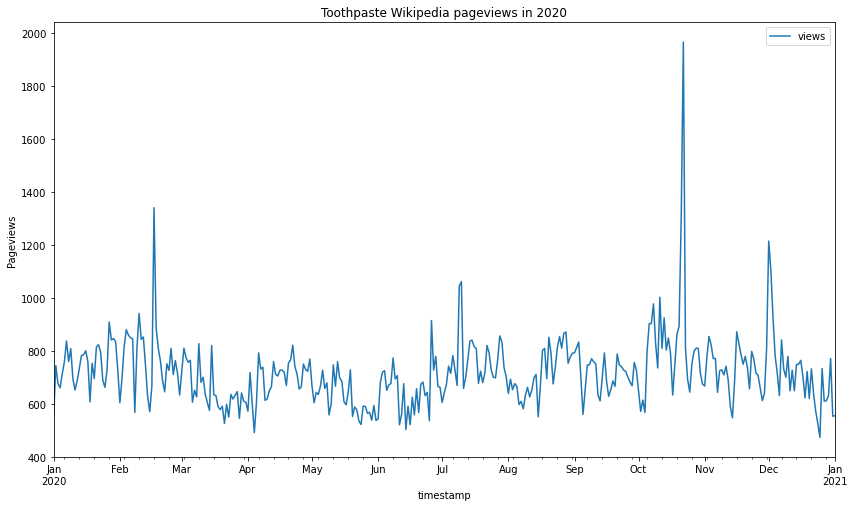

In [17]:
fig = df_a.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("Toothpaste Wikipedia pageviews in 2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

### 2. All pageviews to English Wikipedia, plotted monthly, for 2017-2020: 

#### 2a. For mobile web devices only 



In [18]:
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [19]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
sec_a_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020010100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [20]:
sec_a_monthly_pageviews = api_call(endpoint_pageviews, sec_a_params_pageviews)
sec_a_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017010100',
  'views': 4020148351},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017020100',
  'views': 3522702265},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017030100',
  'views': 3719395296},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017040100',
  'views': 3524571150},
 {'project': 'en.wikipedia',
  'access': 'mobile-web',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017050100',
  'views': 3567882051}]

In [21]:
df_sa = pd.DataFrame(sec_a_monthly_pageviews['items'])
df_sa = df_sa[['timestamp','views']]
df_sa['timestamp'] = pd.to_datetime(df_sa['timestamp'], format="%Y%m%d00").copy()
df_sa = df_sa.set_index('timestamp')
df_sa

,views
timestamp,
2017-01-01,4020148351
2017-02-01,3522702265
2017-03-01,3719395296
2017-04-01,3524571150
2017-05-01,3567882051
2017-06-01,3404097346
2017-07-01,3600941034
2017-08-01,3502234506
2017-09-01,3416989181


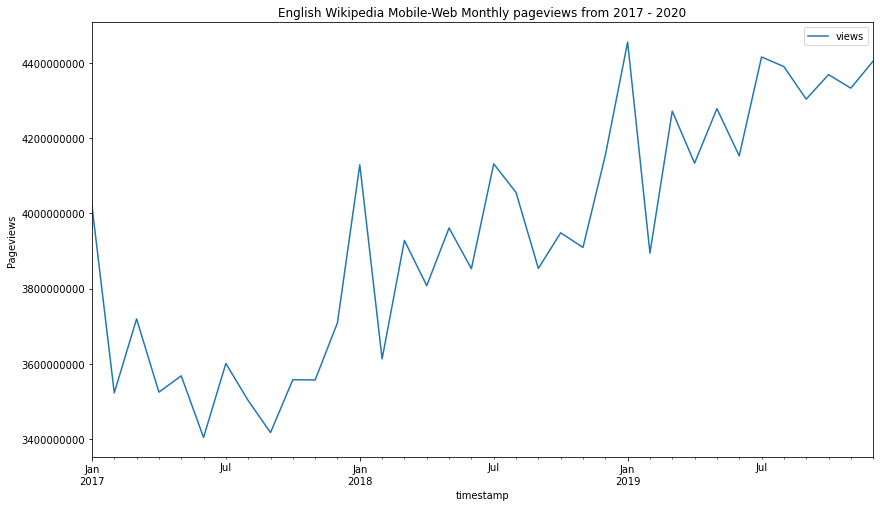

In [22]:
fig = df_sa.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("English Wikipedia Mobile-Web Monthly pageviews from 2017 - 2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

#### 2b. For desktop devices only 

In [23]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
sec_b_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020010100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [24]:
sec_b_monthly_pageviews = api_call(endpoint_pageviews, sec_b_params_pageviews)
sec_b_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017010100',
  'views': 4521980398},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017020100',
  'views': 4026702163},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017030100',
  'views': 4319971902},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017040100',
  'views': 3951456992},
 {'project': 'en.wikipedia',
  'access': 'desktop',
  'agent': 'user',
  'granularity': 'monthly',
  'timestamp': '2017050100',
  'views': 4187870579}]

In [25]:
df_sb = pd.DataFrame(sec_b_monthly_pageviews['items'])
df_sb = df_sb[['timestamp','views']]
df_sb['timestamp'] = pd.to_datetime(df_sb['timestamp'], format="%Y%m%d00").copy()
df_sb = df_sb.set_index('timestamp')
df_sb

,views
timestamp,
2017-01-01,4521980398
2017-02-01,4026702163
2017-03-01,4319971902
2017-04-01,3951456992
2017-05-01,4187870579
2017-06-01,3604550997
2017-07-01,3565444544
2017-08-01,3575572313
2017-09-01,3547447892


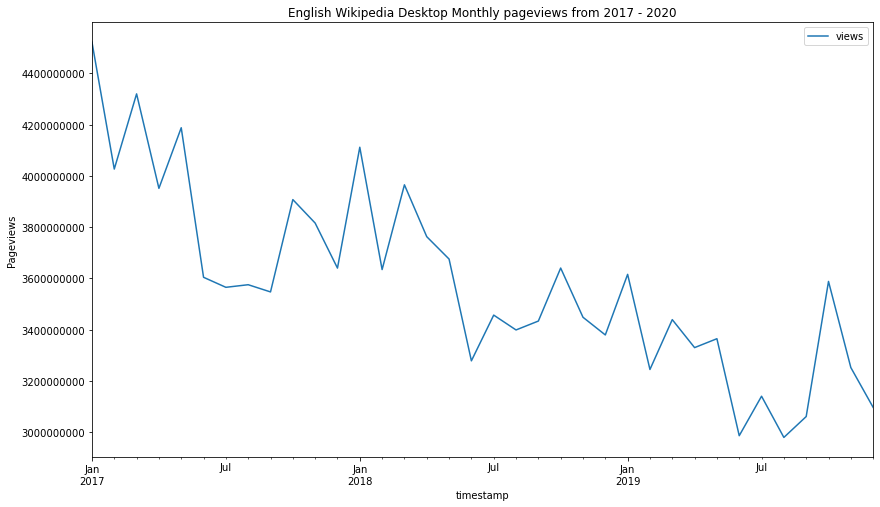

In [26]:
fig = df_sb.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("English Wikipedia Desktop Monthly pageviews from 2017 - 2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

#### 2c. For web spiders (aka crawlers/scrapers) only

In [27]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
sec_c_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "spider",
                    "granularity" : "monthly",
                    "start" : "2017010100", #YYYYMMDDHH
                    "end" :   '2020010100'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [28]:
sec_c_monthly_pageviews = api_call(endpoint_pageviews, sec_c_params_pageviews)
sec_c_monthly_pageviews['items'][0:5]

[{'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'monthly',
  'timestamp': '2017010100',
  'views': 1286697422},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'monthly',
  'timestamp': '2017020100',
  'views': 1199355801},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'monthly',
  'timestamp': '2017030100',
  'views': 1492528838},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'monthly',
  'timestamp': '2017040100',
  'views': 2037943225},
 {'project': 'en.wikipedia',
  'access': 'all-access',
  'agent': 'spider',
  'granularity': 'monthly',
  'timestamp': '2017050100',
  'views': 1667205515}]

In [29]:
df_sc = pd.DataFrame(sec_c_monthly_pageviews['items'])
df_sc = df_sc[['timestamp','views']]
df_sc['timestamp'] = pd.to_datetime(df_sc['timestamp'], format="%Y%m%d00").copy()
df_sc = df_sc.set_index('timestamp')
df_sc

,views
timestamp,
2017-01-01,1286697422
2017-02-01,1199355801
2017-03-01,1492528838
2017-04-01,2037943225
2017-05-01,1667205515
2017-06-01,1214821796
2017-07-01,1097148372
2017-08-01,1099675631
2017-09-01,1251455994


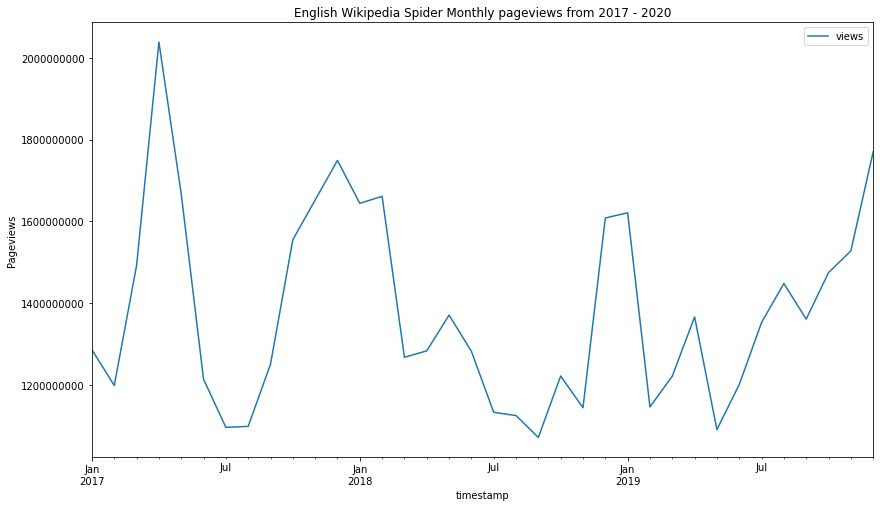

In [30]:
fig = df_sc.plot(figsize=(14,8))
fig.set_ylabel("Pageviews")
fig.set_title("English Wikipedia Spider Monthly pageviews from 2017 - 2020")

fig.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.savefig("pageviews.pdf", dpi=300)

### 3. The top 10 most viewed articles on the same day of your choice, in at least five different language versions of Wikipedia (only needs to be a simple table or list, not a visualization)

#### 05/19/2018, English

In [31]:
top_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top/{project}/{access}/{year}/{month}/{day}'

In [32]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
en_top_params_pageviews = {
                    "project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "year" : "2018",
                    "month" : "05", #YYYYMMDDHH
                    "day" :   '19'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [33]:
en_top_pageviews = api_call(top_pageviews, en_top_params_pageviews)
en_top_pageviews['items'][0]

{'project': 'en.wikipedia',
 'access': 'all-access',
 'year': '2018',
 'month': '05',
 'day': '19',
 'articles': [{'article': 'Main_Page', 'views': 14528074, 'rank': 1},
  {'article': 'Meghan_Markle', 'views': 4256082, 'rank': 2},
  {'article': 'Meghan,_Duchess_of_Sussex', 'views': 2202300, 'rank': 3},
  {'article': 'Prince_Harry,_Duke_of_Sussex', 'views': 1750616, 'rank': 4},
  {'article': 'Special:Search', 'views': 1727845, 'rank': 5},
  {'article': 'Prince_Harry', 'views': 1033549, 'rank': 6},
  {'article': 'Charles,_Prince_of_Wales', 'views': 975491, 'rank': 7},
  {'article': 'Doria_Ragland', 'views': 948666, 'rank': 8},
  {'article': 'Elizabeth_II', 'views': 907224, 'rank': 9},
  {'article': 'Prince_William,_Duke_of_Cambridge',
   'views': 902726,
   'rank': 10},
  {'article': 'Diana,_Princess_of_Wales', 'views': 831261, 'rank': 11},
  {'article': 'Catherine,_Duchess_of_Cambridge', 'views': 617894, 'rank': 12},
  {'article': 'Prince_Philip,_Duke_of_Edinburgh', 'views': 474018, 'ra

In [34]:
df_en = pd.DataFrame(en_top_pageviews['items'][0]['articles'][:10])
df_en

,article,views,rank
0,Main_Page,14528074,1
1,Meghan_Markle,4256082,2
2,"Meghan,_Duchess_of_Sussex",2202300,3
3,"Prince_Harry,_Duke_of_Sussex",1750616,4
4,Special:Search,1727845,5
5,Prince_Harry,1033549,6
6,"Charles,_Prince_of_Wales",975491,7
7,Doria_Ragland,948666,8
8,Elizabeth_II,907224,9
9,"Prince_William,_Duke_of_Cambridge",902726,10


#### Spanish

In [35]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
sp_top_params_pageviews = {
                    "project" : "es.wikipedia.org",
                    "access" : "all-access",
                    "year" : "2018",
                    "month" : "05", #YYYYMMDDHH
                    "day" :   '19'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [36]:
sp_top_pageviews = api_call(top_pageviews, sp_top_params_pageviews)
sp_top_pageviews['items'][0]

{'project': 'es.wikipedia',
 'access': 'all-access',
 'year': '2018',
 'month': '05',
 'day': '19',
 'articles': [{'article': 'Wikipedia:Portada', 'views': 411041, 'rank': 1},
  {'article': 'Meghan_Markle', 'views': 344458, 'rank': 2},
  {'article': 'Enrique_de_Sussex', 'views': 336273, 'rank': 3},
  {'article': 'Margarita_de_Sussex', 'views': 276633, 'rank': 4},
  {'article': 'Especial:Buscar', 'views': 256676, 'rank': 5},
  {'article': 'Meghan_de_Sussex', 'views': 239799, 'rank': 6},
  {'article': 'Isabel_II_del_Reino_Unido', 'views': 224569, 'rank': 7},
  {'article': 'Diana_de_Gales', 'views': 175703, 'rank': 8},
  {'article': 'Guillermo_de_Cambridge', 'views': 148051, 'rank': 9},
  {'article': 'Carlos_de_Gales', 'views': 135016, 'rank': 10},
  {'article': 'Catalina_de_Cambridge', 'views': 130799, 'rank': 11},
  {'article': 'Enrique_de_Gales', 'views': 117992, 'rank': 12},
  {'article': 'Felipe_de_Edimburgo', 'views': 81195, 'rank': 13},
  {'article': 'Camila_de_Cornualles', 'views'

In [37]:
df_sp = pd.DataFrame(sp_top_pageviews['items'][0]['articles'][:10])
df_sp

,article,views,rank
0,Wikipedia:Portada,411041,1
1,Meghan_Markle,344458,2
2,Enrique_de_Sussex,336273,3
3,Margarita_de_Sussex,276633,4
4,Especial:Buscar,256676,5
5,Meghan_de_Sussex,239799,6
6,Isabel_II_del_Reino_Unido,224569,7
7,Diana_de_Gales,175703,8
8,Guillermo_de_Cambridge,148051,9
9,Carlos_de_Gales,135016,10


#### French

In [38]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
fr_top_params_pageviews = {
                    "project" : "fr.wikipedia.org",
                    "access" : "all-access",
                    "year" : "2018",
                    "month" : "05", #YYYYMMDDHH
                    "day" :   '19'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [39]:
fr_top_pageviews = api_call(top_pageviews, fr_top_params_pageviews)
fr_top_pageviews['items'][0]

{'project': 'fr.wikipedia',
 'access': 'all-access',
 'year': '2018',
 'month': '05',
 'day': '19',
 'articles': [{'article': 'Meghan_Markle', 'views': 720400, 'rank': 1},
  {'article': 'Wikipédia:Accueil_principal', 'views': 487643, 'rank': 2},
  {'article': 'Sp?cial:Search', 'views': 314950, 'rank': 3},
  {'article': 'Élisabeth_II', 'views': 237599, 'rank': 4},
  {'article': 'Henry_de_Sussex', 'views': 198824, 'rank': 5},
  {'article': 'Spécial:Recherche', 'views': 135733, 'rank': 6},
  {'article': 'Charles_de_Galles', 'views': 129234, 'rank': 7},
  {'article': 'Henry_de_Galles', 'views': 122031, 'rank': 8},
  {'article': 'William_de_Cambridge', 'views': 111484, 'rank': 9},
  {'article': 'Diana_Spencer', 'views': 109671, 'rank': 10},
  {'article': 'Catherine_Middleton', 'views': 98730, 'rank': 11},
  {'article': 'Philip_Mountbatten', 'views': 83929, 'rank': 12},
  {'article': 'Ordre_de_succession_au_trône_britannique',
   'views': 67819,
   'rank': 13},
  {'article': 'Anne_du_Royaume

In [40]:
df_fr = pd.DataFrame(fr_top_pageviews['items'][0]['articles'][:10])
df_fr

,article,views,rank
0,Meghan_Markle,720400,1
1,Wikipédia:Accueil_principal,487643,2
2,Sp?cial:Search,314950,3
3,Élisabeth_II,237599,4
4,Henry_de_Sussex,198824,5
5,Spécial:Recherche,135733,6
6,Charles_de_Galles,129234,7
7,Henry_de_Galles,122031,8
8,William_de_Cambridge,111484,9
9,Diana_Spencer,109671,10


#### Chinese

In [41]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
ch_top_params_pageviews = {
                    "project" : "zh.wikipedia.org",
                    "access" : "all-access",
                    "year" : "2018",
                    "month" : "05", #YYYYMMDDHH
                    "day" :   '19'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [42]:
ch_top_pageviews = api_call(top_pageviews, ch_top_params_pageviews)

In [43]:
df_ch = pd.DataFrame(ch_top_pageviews['items'][0]['articles'][:10])
df_ch

,article,views,rank
0,Wikipedia:首页,189058,1
1,Special:搜索,84311,2
2,梅根·马克尔,43145,3
3,薩塞克斯公爵哈里王子,37660,4
4,薩塞克斯公爵夫人梅根,35827,5
5,萨塞克斯公爵夫人梅根,35312,6
6,死侍2,28280,7
7,劍橋公爵威廉王子,27638,8
8,劍橋公爵夫人凱薩琳,26889,9
9,威爾斯王妃戴安娜,26558,10


#### German

In [44]:
# SAMPLE parameters for getting aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
ge_top_params_pageviews = {
                    "project" : "de.wikipedia.org",
                    "access" : "all-access",
                    "year" : "2018",
                    "month" : "05", #YYYYMMDDHH
                    "day" :   '19'
                        }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/peter-wu1',
    'From': 'p5wu@ucsd.edu'
}

In [45]:
ge_top_pageviews = api_call(top_pageviews, ge_top_params_pageviews)

In [46]:
df_ge = pd.DataFrame(ge_top_pageviews['items'][0]['articles'][:10])
df_ge

,article,views,rank
0,Wikipedia:Hauptseite,1125557,1
1,Meghan_Markle,367910,2
2,"Meghan,_Duchess_of_Sussex",328426,3
3,"Harry,_Duke_of_Sussex",256525,4
4,Spezial:Suche,232163,5
5,Elisabeth_II.,179654,6
6,"William,_Duke_of_Cambridge",117841,7
7,"Charles,_Prince_of_Wales",108735,8
8,"Diana,_Princess_of_Wales",104322,9
9,"Philip,_Duke_of_Edinburgh",98096,10
